C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


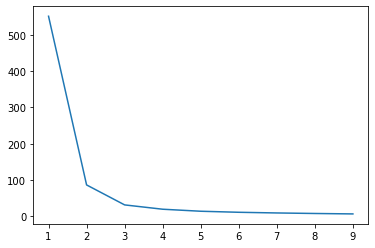

In [29]:
import pandas as pd
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris
%matplotlib inline 

# loading the data
iris = load_iris()

# creating the dataframe
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['flower'] = iris.target

# dropping the unwanted features
df.drop(['sepal length (cm)', 'sepal width (cm)', 'flower'],axis='columns',inplace=True)

# applying the elbow rule to find the optimal number of clusters, in this case 3
k_range = range(1, 10)
sse = []

for k in k_range:
    km = KMeans(n_clusters = k)
    km.fit(df[['petal length (cm)', 'petal width (cm)']])
    sse.append(km.inertia_)

plt.plot(k_range, sse)


In [30]:
# clustering
km = KMeans(n_clusters=3)
yp = km.fit_predict(df)
df['cluster'] = yp

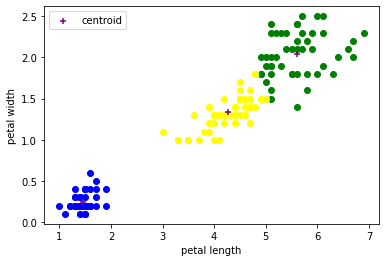

In [28]:
# visualising the data on a scatter plot 

df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='green')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='yellow')

plt.scatter(km.cluster_centers_[:, 0],km.cluster_centers_[:, 1], color = 'purple',marker = '+', label = 'centroid')

plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend()